In [1]:
# decision tree: https://en.wikipedia.org/wiki/Decision_tree#:~:text=A%20decision%20tree%20is%20a%20flowchart%2Dlike%20structure%20in%20which,taken%20after%20computing%20all%20attributes).
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
# https://graphviz.org/
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html
# https://pypi.org/project/pydotplus/
# https://www.kaggle.com/uciml/pima-indians-diabetes-database
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import metrics

In [2]:
pima =  pd.read_csv("diabetes.csv")
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# feature selection from importance(+) to importance(-)
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction']
x = pima[feature_cols]
y = pima.Outcome

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state=1) # 70% training and 30% test.

In [5]:
# decision tree model
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=3)
classifier = classifier.fit(X_train,Y_train) # train
y_pred = classifier.predict(X_test)

# model accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
print("Apercent accuracy: {:.2f}%".format(metrics.accuracy_score(Y_test, y_pred) * 100))

Accuracy: 0.7705627705627706
Apercent accuracy: 77.06%


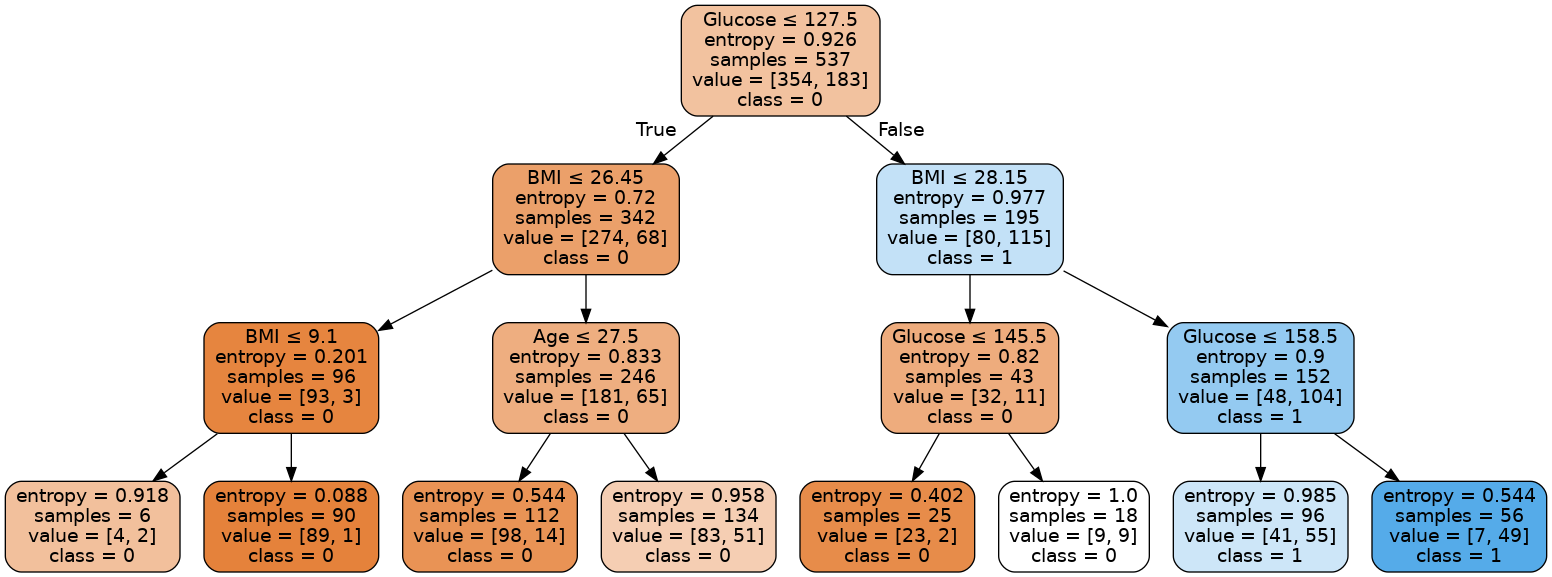

In [6]:
# visualizing Decision Trees 
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())